# Distance inference between contigs

By now we have inferred distance between contigs based on Maximum Liklihood Estimate. The results are in file `distance.txt`.

In [1]:
!head distance.txt

#Contig1	Contig2	Length1	Length2	LDE1	LDE2	LDE	ObservedLinks	ExpectedLinksIfAdjacent	MLEdistance
jpcChr1.ctg199	jpcChr1.ctg257	124567	274565	0.3195	2.0838	1.1607	2	27.4	1617125
idcChr1.ctg353	idcChr1.ctg382	143105	270892	2.1577	1.0544	1.3505	2	34.2	2190000
jpcChr1.ctg373	jpcChr1.ctg379	153398	63193	1.2697	0.4859	0.9594	2	12.0	325545
jpcChr1.ctg125	jpcChr1.ctg174	178182	134096	1.6988	1.2466	1.4874	2	30.4	1482910
idcChr1.ctg385	idcChr1.ctg461	201792	195332	2.2693	2.6181	2.4346	5	63.6	1548564
idcChr1.ctg104	idcChr1.ctg146	215933	64665	1.1102	0.8443	1.0423	2	15.0	524288
jpcChr1.ctg67	jpcChr1.ctg76	99865	11957	1.6615	0.2000	1.3249	2	4.1	37315
idcChr1.ctg284	idcChr1.ctg48	218292	301915	0.6696	2.0850	1.2945	2	43.1	3683127
idcChr1.ctg314	jpcChr1.ctg305	50575	282724	0.2000	1.7503	1.2594	3	16.8	387141


The truth is in file `ctg.posi.bed`.

In [2]:
!head ctg.posi.bed

idcChr1	1	127964	idcChr1.ctg1
idcChr1	127965	176555	idcChr1.ctg2
idcChr1	176556	296400	idcChr1.ctg3
idcChr1	296401	481842	idcChr1.ctg4
idcChr1	481843	725279	idcChr1.ctg5
idcChr1	725280	726201	idcChr1.ctg6
idcChr1	726202	811858	idcChr1.ctg7
idcChr1	811859	1016514	idcChr1.ctg8
idcChr1	1016515	1090313	idcChr1.ctg9
idcChr1	1090314	1122899	idcChr1.ctg10


## Analysis

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
#matplotlib.rcParams['text.usetex'] = True


import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("distance.txt", sep="\t")
df.head()

,#Contig1,Contig2,Length1,Length2,LDE1,LDE2,LDE,ObservedLinks,ExpectedLinksIfAdjacent,MLEdistance
0,jpcChr1.ctg199,jpcChr1.ctg257,124567,274565,0.3195,2.0838,1.1607,2,27.4,1617125
1,idcChr1.ctg353,idcChr1.ctg382,143105,270892,2.1577,1.0544,1.3505,2,34.2,2190000
2,jpcChr1.ctg373,jpcChr1.ctg379,153398,63193,1.2697,0.4859,0.9594,2,12.0,325545
3,jpcChr1.ctg125,jpcChr1.ctg174,178182,134096,1.6988,1.2466,1.4874,2,30.4,1482910
4,idcChr1.ctg385,idcChr1.ctg461,201792,195332,2.2693,2.6181,2.4346,5,63.6,1548564


In [5]:
from jcvi.formats.bed import Bed

bed = Bed("ctg.posi.bed")
print "\n".join(str(x) for x in bed[:10])

14:22:14 [base] Load file `ctg.posi.bed`


idcChr1	1	127964	idcChr1.ctg1
idcChr1	127965	176555	idcChr1.ctg2
idcChr1	176556	296400	idcChr1.ctg3
idcChr1	296401	481842	idcChr1.ctg4
idcChr1	481843	725279	idcChr1.ctg5
idcChr1	725280	726201	idcChr1.ctg6
idcChr1	726202	811858	idcChr1.ctg7
idcChr1	811859	1016514	idcChr1.ctg8
idcChr1	1016515	1090313	idcChr1.ctg9
idcChr1	1090314	1122899	idcChr1.ctg10


In [32]:
data = []
order = bed.order
for i, row in df.iterrows():
    at, bt = row["#Contig1"], row["Contig2"]
    pair = ";".join((at, bt))
    nlinks = row["ObservedLinks"]
    if nlinks < 2:
        continue
    inferred_dist = row["MLEdistance"]
    ai, abed = order[at] 
    bi, bbed = order[bt]
    if abed.seqid == bbed.seqid:
        if abed.start > bbed.start:
            abed, bbed = bbed, abed
        true_dist = bbed.end - abed.start
    else:
        true_dist = 100000000
    data.append((pair, nlinks, inferred_dist, true_dist))

In [33]:
tf = pd.DataFrame(data, columns=["Pair", "ObservedLinks", "InferredDist", "TrueDist"])
tf.head()

,Pair,ObservedLinks,InferredDist,TrueDist
0,jpcChr1.ctg199;jpcChr1.ctg257,2,1617125,4852517
1,idcChr1.ctg353;idcChr1.ctg382,2,2190000,3481690
2,jpcChr1.ctg373;jpcChr1.ctg379,2,325545,632562
3,jpcChr1.ctg125;jpcChr1.ctg174,2,1482910,5281491
4,idcChr1.ctg385;idcChr1.ctg461,5,1548564,6924766


In [34]:
tf.shape

(7334, 4)

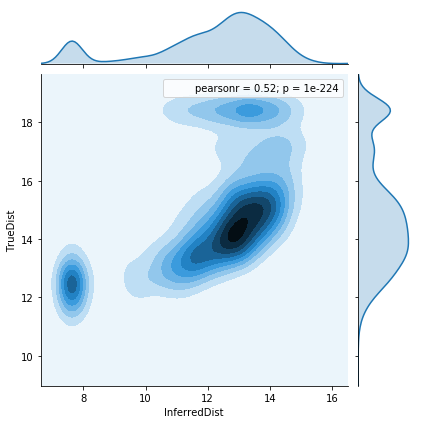

In [18]:
sns.jointplot(np.log(tf["InferredDist"]), np.log(tf["TrueDist"]), kind="kde")

## Cross-validation

We now iterate over several threshold to see if one could differentiate, qualitatively, adjacent contigs against non-adjacent contigs.

In [19]:
def CrossValidation(df, threshold=0, truethreshold=1000000):
    TP, TN, FP, FN = 0, 0, 0, 0
    TPS, TNS, FPS, FNS = [], [], [], []
    for i, row in df.iterrows():
        inferred_dist, true_dist = row["InferredDist"], row["TrueDist"]
        if inferred_dist < threshold: # positive
            if true_dist < truethreshold:
                TP += 1
            else:
                FP += 1
        else:  # negative
            if true_dist >= truethreshold:
                TN += 1
            else:
                FN += 1
                FNS.append(row)
    FPR = FP * 1. / (FP + TN)
    TPR = TP * 1. / (TP + FN)
    ACC = (TP + TN) * 1. / (TP + TN + FP + FN)
    return TP, TN, FP, FN, FPR, TPR, ACC, FNS[:10]

CrossValidation(tf, threshold=500000)

(1029,
 1162,
 1020,
 61,
 0.4674610449129239,
 0.9440366972477064,
 0.6696210268948656,
 [Pair            idcChr1.ctg43;idcChr1.ctg48
  InferredDist                         623487
  TrueDist                             956309
  Name: 6, dtype: object, Pair            idcChr1.ctg47;idcChr1.ctg49
  InferredDist                         571740
  TrueDist                             630265
  Name: 135, dtype: object, Pair            jpcChr1.ctg451;jpcChr1.ctg460
  InferredDist                           623487
  TrueDist                               982109
  Name: 251, dtype: object, Pair            idcChr1.ctg330;idcChr1.ctg338
  InferredDist                           679917
  TrueDist                               828578
  Name: 328, dtype: object, Pair            idcChr1.ctg110;idcChr1.ctg119
  InferredDist                           547500
  TrueDist                               983402
  Name: 473, dtype: object, Pair            idcChr1.ctg37;idcChr1.ctg47
  InferredDist               

In [23]:
roc = []
for i in range(0, 3000000, 100000):
    c = CrossValidation(tf, threshold=i)
    if i % 500000 == 0: 
        print i, c[:-1]
    roc.append(tuple([i] + list(c[:-1])))
    
rf = pd.DataFrame(roc, columns=["Threshold", "TP", "TN", "FP", "FN", "FPR", "TPR", "ACC"])
rf.head()

0 (0, 2182, 0, 1090, 0.0, 0.0, 0.6668704156479217)
500000 (1029, 1162, 1020, 61, 0.4674610449129239, 0.9440366972477064, 0.6696210268948656)
1000000 (1082, 594, 1588, 8, 0.7277726856095326, 0.9926605504587156, 0.5122249388753056)
1500000 (1088, 292, 1890, 2, 0.8661778185151238, 0.998165137614679, 0.421760391198044)
2000000 (1088, 160, 2022, 2, 0.9266727772685609, 0.998165137614679, 0.38141809290953543)
2500000 (1089, 73, 2109, 1, 0.9665444546287809, 0.9990825688073395, 0.35513447432762835)


,Threshold,TP,TN,FP,FN,FPR,TPR,ACC
0,0,0,2182,0,1090,0.000000,0.000000,0.666870
1,100000,691,1982,200,399,0.091659,0.633945,0.816932
2,200000,859,1764,418,231,0.191567,0.788073,0.801650
3,300000,952,1556,626,138,0.286893,0.873394,0.766504
4,400000,997,1339,843,93,0.386343,0.914679,0.713936


Text(0.5,1,'ROC curve')

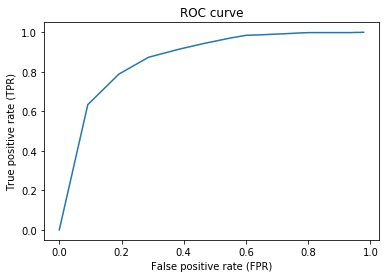

In [24]:
import matplotlib.pyplot as plt

plt.plot(rf["FPR"], rf["TPR"])
ax = plt.gca()
ax.set_xlabel("False positive rate (FPR)")
ax.set_ylabel("True positive rate (TPR)")
ax.set_title("ROC curve")

In [25]:
rf

,Threshold,TP,TN,FP,FN,FPR,TPR,ACC
0,0,0,2182,0,1090,0.000000,0.000000,0.666870
1,100000,691,1982,200,399,0.091659,0.633945,0.816932
2,200000,859,1764,418,231,0.191567,0.788073,0.801650
3,300000,952,1556,626,138,0.286893,0.873394,0.766504
4,400000,997,1339,843,93,0.386343,0.914679,0.713936
5,500000,1029,1162,1020,61,0.467461,0.944037,0.669621
6,600000,1059,976,1206,31,0.552704,0.971560,0.621944
7,700000,1073,872,1310,17,0.600367,0.984404,0.594438
8,800000,1076,762,1420,14,0.650779,0.987156,0.561736
9,900000,1080,655,1527,10,0.699817,0.990826,0.530257


## Customized edge selector

There are several issues with just thresholding `MLEDistance` (say `MLEDistance < 512Kb`):
- Some nodes may get excluded since all their edges have a predicted long distance
- Some nodes, particularly contigs with low link density, tend to have small `MLEDistance` but in fact are not at all significant

## Ground truth path

Make a ground truth path and use `allhic.anchor()` to generate matrix and plot it in `jcvi.assembly.hic.heatmap()`.

In [1]:
!head ctg.posi.bed

idcChr1	1	127964	idcChr1.ctg1
idcChr1	127965	176555	idcChr1.ctg2
idcChr1	176556	296400	idcChr1.ctg3
idcChr1	296401	481842	idcChr1.ctg4
idcChr1	481843	725279	idcChr1.ctg5
idcChr1	725280	726201	idcChr1.ctg6
idcChr1	726202	811858	idcChr1.ctg7
idcChr1	811859	1016514	idcChr1.ctg8
idcChr1	1016515	1090313	idcChr1.ctg9
idcChr1	1090314	1122899	idcChr1.ctg10


In [1]:
from jcvi.formats.bed import Bed

bed = Bed("ctg.posi.bed")

19:37:11 [base] Load file `ctg.posi.bed`


In [4]:
contigs = []
sizes = []
chrs = ["idcChr1", "jpcChr1"]
for c in chrs:
    for b in bed.sub_bed(c):
        contigs.append(b.accn)
        sizes.append(b.span)

with open("rice_truth.tour", "w") as fw:
    print >> fw, ">TRUTH"
    print >> fw, " ".join(x + "+" for x in contigs)

In [3]:
print(len(contigs))

992


In [5]:
from jcvi.assembly.base import calculate_A50

print(calculate_A50(sizes))

(array([  358346,   709598,  1058981,  1379910,  1682293,  1984208,
        2277372,  2567174,  2854846,  3137570,  3412449,  3687014,
        3959758,  4232218,  4504105,  4775230,  5046122,  5316991,
        5586095,  5854596,  6121265,  6387083,  6649994,  6911770,
        7172076,  7431252,  7688990,  7946649,  8201200,  8449286,
        8695733,  8939169,  9181289,  9422272,  9662279,  9900212,
       10136081, 10370442, 10604155, 10836172, 11067780, 11295635,
       11522776, 11745981, 11967507, 12188544, 12408901, 12629167,
       12849282, 13069143, 13288070, 13506362, 13724171, 13941773,
       14157706, 14373497, 14588504, 14803374, 15016348, 15228971,
       15441255, 15652783, 15862866, 16072070, 16278708, 16484828,
       16689483, 16893724, 17097495, 17300586, 17503523, 17706253,
       17908045, 18109386, 18310683, 18510644, 18709097, 18905683,
       19101759, 19297727, 19493625, 19688957, 19883543, 20077142,
       20270328, 20463403, 20655499, 20846344, 21035293, 2122